## **Descriptive Statistical Analysis and Data Exploration**

In [1]:
!pip install pandas

In [2]:
import pandas as pd

/Users/fangguoguo/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import os

# Folder path where the files for one month's data set of fraudulent calls are located
folder_path = '/Users/fangguoguo/Desktop/fraud_call_project/datasets'
# Get the names of all files in the folder
file_names = os.listdir(folder_path)
# Create an empty list of DataFrames
dataframes = []

for file in file_names:
    if file.endswith('.csv'):  # Ensure that only CSV files are processed
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Merge all DataFrames
merged_data = pd.concat(dataframes, ignore_index=True)

/var/folders/k7/zytrtrv95lv85tshx_l_7cmr0000gn/T/ipykernel_3764/565295306.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
# Check the results of the merger
merged_data.head()

,Company_Phone_Number,Created_Date,Violation_Date,Consumer_City,Consumer_State,Consumer_Area_Code,Subject,Recorded_Message_Or_Robocall
0,7139449594.0,2024-04-24 00:04:58,2024-04-23 15:29:00,"Houston, Texas",Texas,713.0,Other,Y
1,8337351894.0,2024-04-24 00:06:12,2024-04-24 12:00:00,Mansfield,Connecticut,860.0,"Calls pretending to be government, businesses,...",Y
2,7349316235.0,2024-04-24 00:07:05,2024-04-23 12:50:00,"Houston, Texas",Texas,713.0,Other,Y
3,4407350231.0,2024-04-24 00:08:05,2024-04-23 13:25:00,Cardington,Ohio,614.0,Other,Y
4,8472008284.0,2024-04-24 00:10:25,2024-04-23 14:03:00,NaN,Illinois,847.0,Dropped call or no message,Y


In [5]:
# Data sets that hold merged fraudulent phone calls
merged_data.to_csv('/Users/fangguoguo/Desktop/fraud_call_project/datasets/merged_dataset.csv', index=False)

In [6]:
fraud_data_path = '/Users/fangguoguo/Desktop/fraud_call_project/datasets/merged_dataset.csv'

* Economic data collection

In [7]:
economic_data_path = '/Users/fangguoguo/Desktop/fraud_call_project/Table-3.csv'

In [8]:
# Skip the first four lines and read the economic data
economic_gdp_df = pd.read_csv(economic_data_path, skiprows=6)
economic_gdp_df.drop(economic_gdp_df.columns[0], axis=1, inplace=True)

In [9]:
# View dataset of state economic characteristics
economic_gdp_df.head()

,United States,3,Per capita personal income (dollars) 2,68531
0,Alabama,1.0,Personal income (millions of dollars),271640.4
1,Alabama,2.0,Population (persons) 1,5108468.0
2,Alabama,3.0,Per capita personal income (dollars) 2,53175.0
3,Alaska *,1.0,Personal income (millions of dollars),52523.9
4,Alaska *,2.0,Population (persons) 1,733406.0


--------------
6.2 new element

Preprocessing economic characterization datasets

In [10]:
# Updating column names
economic_gdp_df.rename(columns={
    'United States': 'State',
    '3': 'LineCode',
    'Per capita personal income (dollars) 2': 'Description',
    '68531': 'Year2023'
}, inplace=True)

economic_gdp_df.head()

,State,LineCode,Description,Year2023
0,Alabama,1.0,Personal income (millions of dollars),271640.4
1,Alabama,2.0,Population (persons) 1,5108468.0
2,Alabama,3.0,Per capita personal income (dollars) 2,53175.0
3,Alaska *,1.0,Personal income (millions of dollars),52523.9
4,Alaska *,2.0,Population (persons) 1,733406.0


In [11]:
# Display the last 10 rows of data
economic_gdp_df.tail(10)

,State,LineCode,Description,Year2023
174,Far West *,1.0,Personal income (millions of dollars),4387201.2
175,Far West *,2.0,Population (persons) 1,56374151.0
176,Far West *,3.0,Per capita personal income (dollars) 2,77823.0
177,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN
180,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN


In [12]:
# Remove the last 7 rows
economic_gdp_df = economic_gdp_df[:-7]

In [13]:
economic_gdp_df = economic_gdp_df.pivot(index='State', columns='Description', values='Year2023')

# Reset the index to make 'State' a column
economic_gdp_df.reset_index(inplace=True)

In [14]:
economic_gdp_df.tail(60)

Description,State,Per capita personal income (dollars) 2,Personal income (millions of dollars),Population (persons) 1
0,Alabama,53175.0,271640.4,5108468.0
1,Alaska *,71616.0,52523.9,733406.0
2,Arizona,61652.0,458153.8,7431344.0
3,Arkansas,54347.0,166721.8,3067732.0
4,California,80423.0,3133678.9,38965193.0
5,Colorado,78918.0,463852.1,5877610.0
6,Connecticut,87447.0,316311.2,3617176.0
7,Delaware,65392.0,67477.8,1031890.0
8,District of Columbia,100909.0,68514.6,678972.0
9,Far West *,77823.0,4387201.2,56374151.0


In [15]:
# Remove asterisks from all names in the 'State' column
economic_gdp_df['State'] = economic_gdp_df['State'].str.replace('*', '').str.strip()

economic_gdp_df.tail(60)

Description,State,Per capita personal income (dollars) 2,Personal income (millions of dollars),Population (persons) 1
0,Alabama,53175.0,271640.4,5108468.0
1,Alaska,71616.0,52523.9,733406.0
2,Arizona,61652.0,458153.8,7431344.0
3,Arkansas,54347.0,166721.8,3067732.0
4,California,80423.0,3133678.9,38965193.0
5,Colorado,78918.0,463852.1,5877610.0
6,Connecticut,87447.0,316311.2,3617176.0
7,Delaware,65392.0,67477.8,1031890.0
8,District of Columbia,100909.0,68514.6,678972.0
9,Far West,77823.0,4387201.2,56374151.0


Dataset of pre-processed telephone fraud reports

In [16]:
# Read fraudulent data
fraud_df = pd.read_csv(fraud_data_path)
fraud_df.head(20)

/var/folders/k7/zytrtrv95lv85tshx_l_7cmr0000gn/T/ipykernel_3764/1633409480.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  fraud_df = pd.read_csv(fraud_data_path)


,Company_Phone_Number,Created_Date,Violation_Date,Consumer_City,Consumer_State,Consumer_Area_Code,Subject,Recorded_Message_Or_Robocall
0,7139449594.0,2024-04-24 00:04:58,2024-04-23 15:29:00,"Houston, Texas",Texas,713.0,Other,Y
1,8337351894.0,2024-04-24 00:06:12,2024-04-24 12:00:00,Mansfield,Connecticut,860.0,"Calls pretending to be government, businesses,...",Y
2,7349316235.0,2024-04-24 00:07:05,2024-04-23 12:50:00,"Houston, Texas",Texas,713.0,Other,Y
3,4407350231.0,2024-04-24 00:08:05,2024-04-23 13:25:00,Cardington,Ohio,614.0,Other,Y
4,8472008284.0,2024-04-24 00:10:25,2024-04-23 14:03:00,NaN,Illinois,847.0,Dropped call or no message,Y
5,5807333170.0,2024-04-24 00:10:39,2024-04-23 10:04:00,"Houston, Texas",Texas,713.0,Other,Y
6,7712120619.0,2024-04-24 00:12:24,2024-04-23 09:27:00,Enumclaw,Washington,360.0,Other,N
7,7137148149.0,2024-04-24 00:13:33,2024-04-23 09:43:00,"Houston, Texas",Texas,713.0,Other,Y
8,4256482288.0,2024-04-24 00:14:54,2024-04-23 13:05:00,Enumclaw,Washington,360.0,Other,N
9,4102204225.0,2024-04-24 00:14:57,2024-04-23 19:53:00,Owings Mills,Maryland,443.0,Dropped call or no message,NaN


In [17]:
# Extract the variables we need to create a new dataset
fd_columns_include = ["Violation_Date", "Consumer_State", "Subject", "Recorded_Message_Or_Robocall"]

fd_data = fraud_df[fd_columns_include].copy()

fd_data.head()

,Violation_Date,Consumer_State,Subject,Recorded_Message_Or_Robocall
0,2024-04-23 15:29:00,Texas,Other,Y
1,2024-04-24 12:00:00,Connecticut,"Calls pretending to be government, businesses,...",Y
2,2024-04-23 12:50:00,Texas,Other,Y
3,2024-04-23 13:25:00,Ohio,Other,Y
4,2024-04-23 14:03:00,Illinois,Dropped call or no message,Y


In [18]:
# Check for null values in the dataset
fd_data.isnull().sum()

Violation_Date                      0
Consumer_State                   2584
Subject                             0
Recorded_Message_Or_Robocall    73536
dtype: int64

In [19]:
# Since the dataset contains a large amount of data, the choice was made to delete data where null values existed.
fd_data_clean = fd_data.dropna(subset=['Consumer_State', 'Recorded_Message_Or_Robocall'])
# Checking the dataset after clearing nulls
fd_data_clean.isnull().sum()

Violation_Date                  0
Consumer_State                  0
Subject                         0
Recorded_Message_Or_Robocall    0
dtype: int64

In [20]:
fd_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632576 entries, 0 to 708443
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Violation_Date                632576 non-null  object
 1   Consumer_State                632576 non-null  object
 2   Subject                       632576 non-null  object
 3   Recorded_Message_Or_Robocall  632576 non-null  object
dtypes: object(4)
memory usage: 24.1+ MB


In [21]:
# Change the data format of Violation_Date to a time format
fd_data_clean['Violation_Date'] = pd.to_datetime(fd_data_clean['Violation_Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

fd_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632576 entries, 0 to 708443
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Violation_Date                632572 non-null  datetime64[ns]
 1   Consumer_State                632576 non-null  object        
 2   Subject                       632576 non-null  object        
 3   Recorded_Message_Or_Robocall  632576 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.1+ MB


/var/folders/k7/zytrtrv95lv85tshx_l_7cmr0000gn/T/ipykernel_3764/2013434614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd_data_clean['Violation_Date'] = pd.to_datetime(fd_data_clean['Violation_Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [22]:
fd_data_clean.head()

,Violation_Date,Consumer_State,Subject,Recorded_Message_Or_Robocall
0,2024-04-23 15:29:00,Texas,Other,Y
1,2024-04-24 12:00:00,Connecticut,"Calls pretending to be government, businesses,...",Y
2,2024-04-23 12:50:00,Texas,Other,Y
3,2024-04-23 13:25:00,Ohio,Other,Y
4,2024-04-23 14:03:00,Illinois,Dropped call or no message,Y


Descriptive statistical analysis

Description  Per capita personal income (dollars) 2  \
count                                     59.000000   
mean                                   67295.305085   
std                                     9977.173937   
min                                    48110.000000   
25%                                    60766.500000   
50%                                    65392.000000   
75%                                    73098.000000   
max                                   100909.000000   

Description  Personal income (millions of dollars)  Population (persons) 1  
count                                 5.900000e+01            5.900000e+01  
mean                                  7.780349e+05            1.135305e+07  
std                                   1.130467e+06            1.648113e+07  
min                                   4.303230e+04            5.840570e+05  
25%                                   1.250616e+05            2.046375e+06  
50%                                   3.78

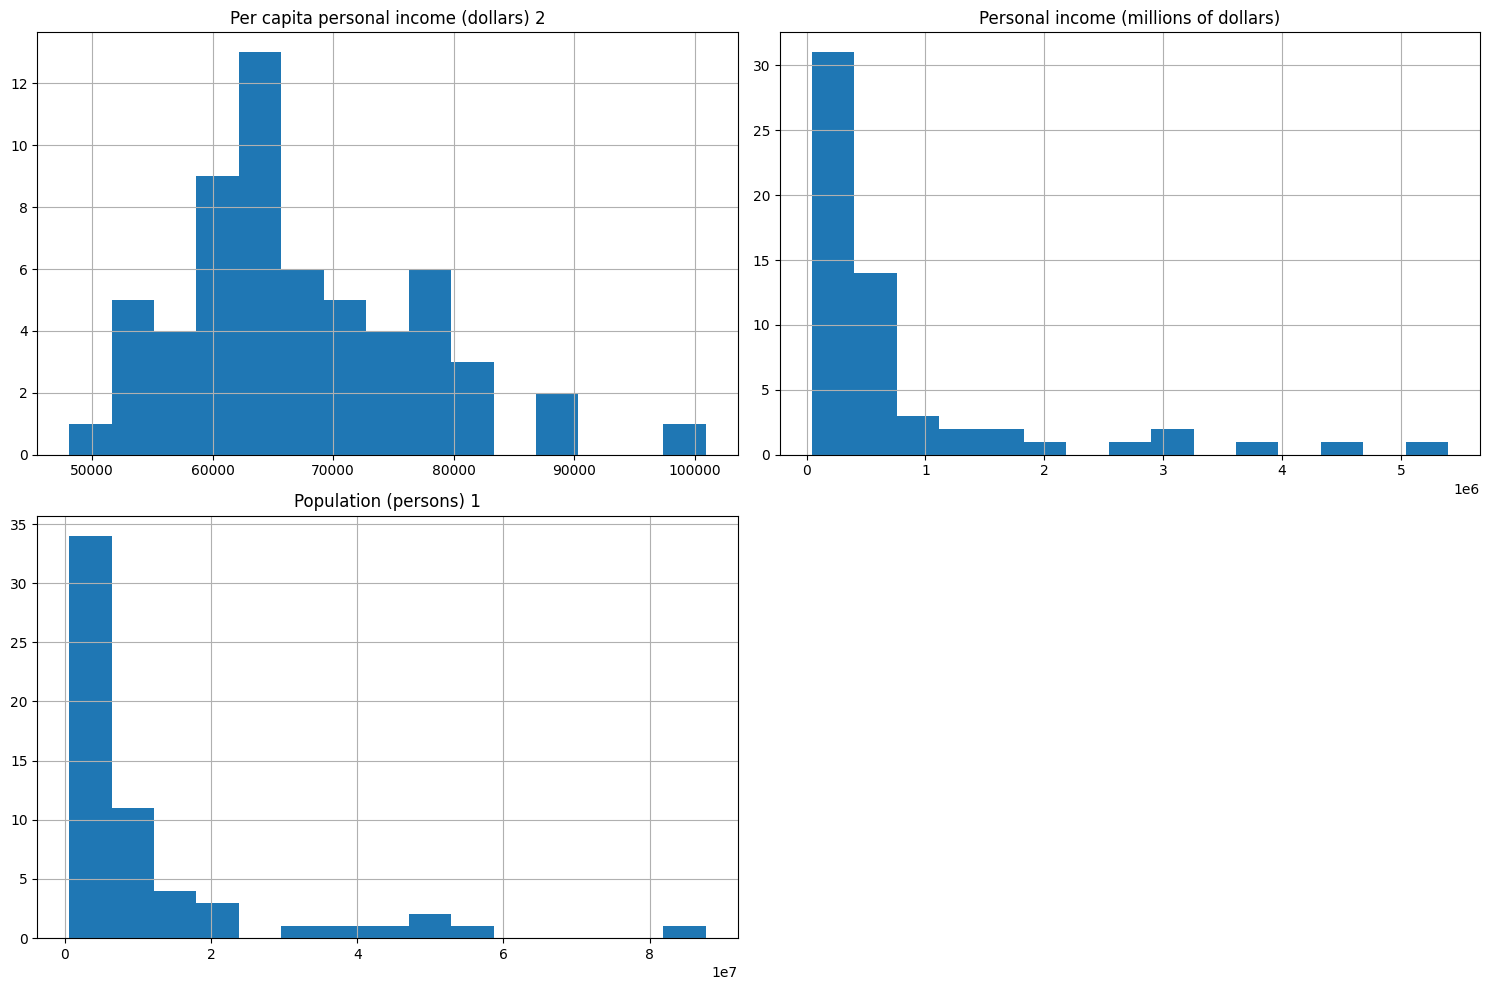

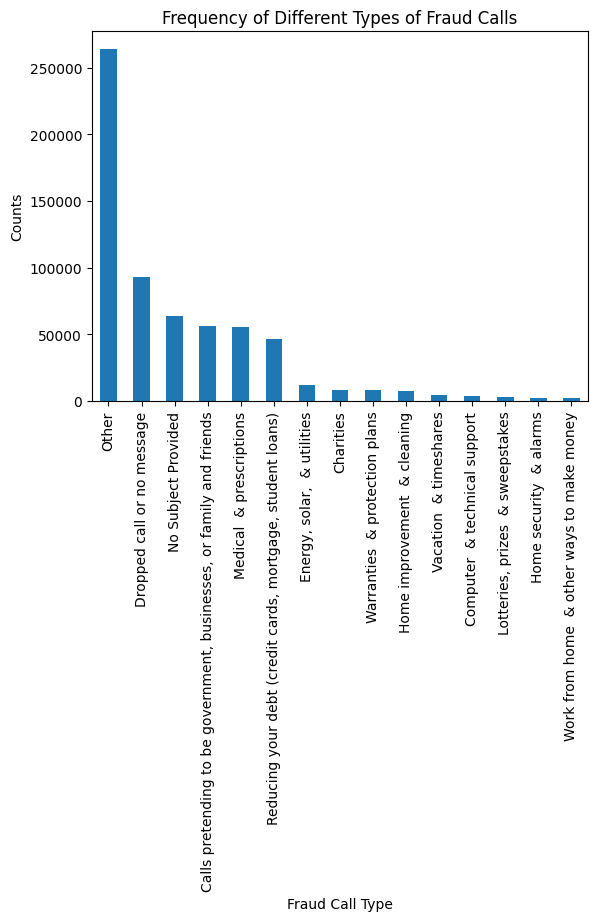

In [23]:
import matplotlib.pyplot as plt
# descriptive statistics
print(economic_gdp_df.describe())
print(fd_data_clean.describe(include='all'))

# Histogram of the distribution of economic data
economic_gdp_df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Counts of different types of fraud in telephone fraud data
fd_data_clean['Subject'].value_counts().plot(kind='bar')
plt.title('Frequency of Different Types of Fraud Calls')
plt.xlabel('Fraud Call Type')
plt.ylabel('Counts')
plt.show()

Data on economic characteristics show that per capita personal income varies significantly from state to state, averaging $67,295.31, but ranging from $48,110 to $100,909. Personal income and population size also showed significant fluctuations, averaging $7,780,349,000 and 11,353,050 people, respectively. Phone scam report data shows that California has the most scam reports and a wide range of scam types, with the highest percentage in the "other" category. Overall, whether there is some correlation between economic characteristics and telephone fraud activity requires further in-depth analysis to verify these associations.

Data visualizations

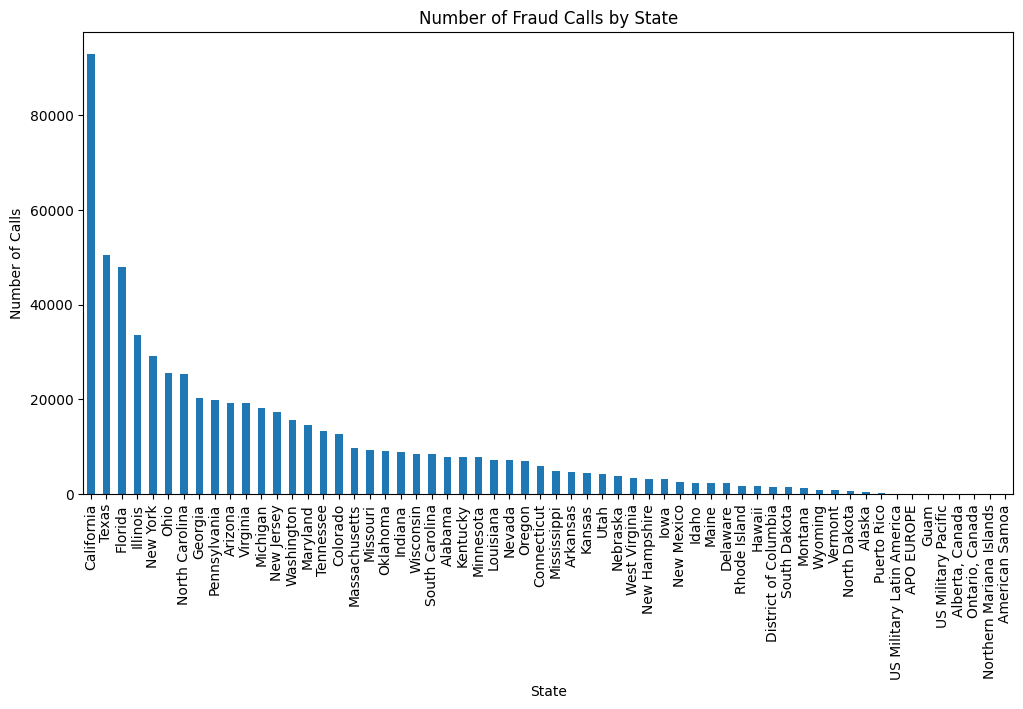

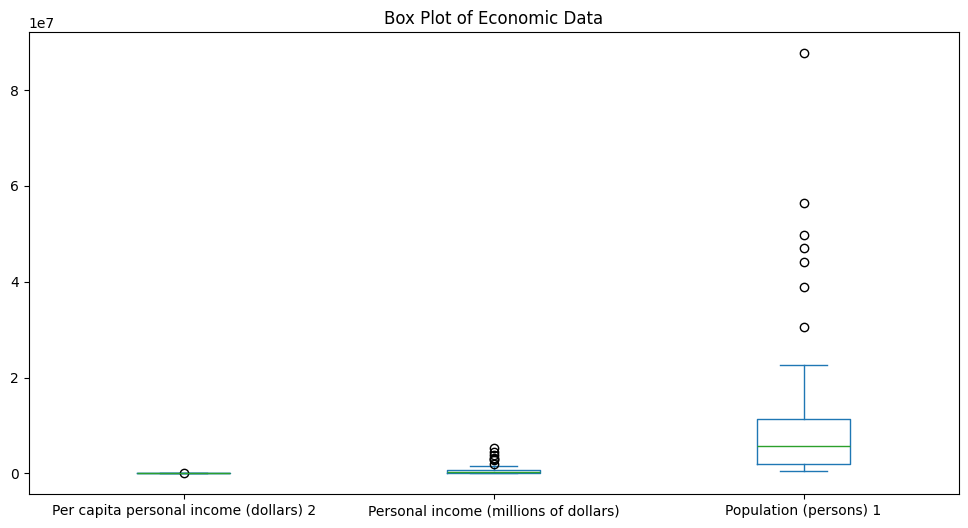

In [24]:
# Histogram showing frequency of fraudulent calls
fd_data_clean['Consumer_State'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Number of Fraud Calls by State')
plt.xlabel('State')
plt.ylabel('Number of Calls')
plt.show()

# Box plot showing the distribution of economic data
economic_gdp_df.plot(kind='box', figsize=(12, 6))
plt.title('Box Plot of Economic Data')
plt.show()

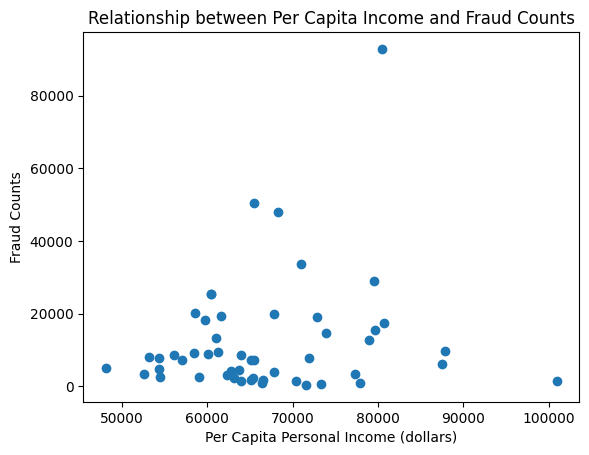

In [25]:
fraud_counts = fd_data_clean['Consumer_State'].value_counts().reset_index()
fraud_counts.columns = ['State', 'Fraud_Counts']

# Consolidation of economic data and number of fraudulent calls
merged_analysis_df = pd.merge(economic_gdp_df, fraud_counts, on='State', how='inner')

# Scatterplot analysis of the relationship between economic indicators and the number of fraudulent phone calls
plt.scatter(merged_analysis_df['Per capita personal income (dollars) 2'], merged_analysis_df['Fraud_Counts'])
plt.title('Relationship between Per Capita Income and Fraud Counts')
plt.xlabel('Per Capita Personal Income (dollars)')
plt.ylabel('Fraud Counts')
plt.show()

Correlation analysis

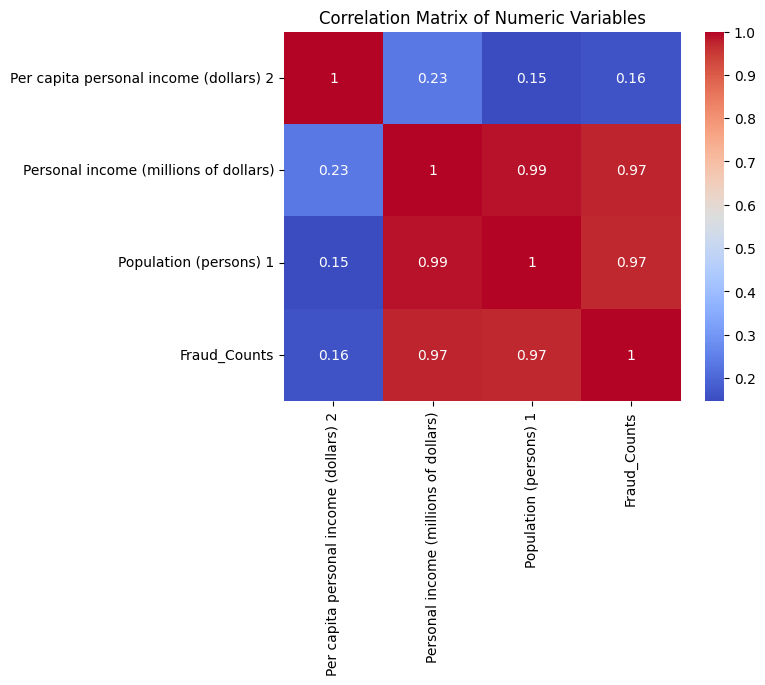

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = merged_analysis_df.select_dtypes(include=[np.number])  
correlation_matrix = numeric_data.corr()

# Correlation heat maps using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

The results of the analysis show that there is a strong positive correlation between total personal income and population size and the number of fraudulent telephone calls, with correlation coefficients of 0.97 and 0.99, respectively, indicating that the more populous a region is, the higher its total income and the greater the number of fraudulent telephone calls it makes. The association between per capita personal income and the number of fraudulent calls is weaker, with a correlation coefficient of only 0.16, reflecting the low impact of per capita income on telephone fraudulent activities. These insights reveal the role of economic and demographic factors in telephone fraudulent activities, providing a basis for further analysis and prevention. 

Since the study involves three questions (correlation between economic and phone fraud dialing times, robo-voice use, and fraud themes), I merged the three datasets separately to facilitate subsequent analysis.

In [27]:
# Convert the 'Violation_Date' column to datetime
fd_data_clean['Violation_Date'] = pd.to_datetime(fd_data_clean['Violation_Date'])

# Define a function to categorize the time of day
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column for the time of day category
fd_data_clean['Time_of_Day'] = fd_data_clean['Violation_Date'].dt.hour.apply(categorize_time_of_day)

# Count Violation_Date by Consumer_State and Time_of_Day
time_of_day_stats = fd_data_clean.groupby(['Consumer_State', 'Time_of_Day']).size().reset_index(name='Count')

# Count Subject by Consumer_State
subject_stats = fd_data_clean.groupby(['Consumer_State', 'Subject']).size().reset_index(name='Count')

# Count Recorded_Message_Or_Robocall by Consumer_State
recorded_message_stats = fd_data_clean.groupby(['Consumer_State', 'Recorded_Message_Or_Robocall']).size().reset_index(name='Count')

/var/folders/k7/zytrtrv95lv85tshx_l_7cmr0000gn/T/ipykernel_3764/1761440270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd_data_clean['Violation_Date'] = pd.to_datetime(fd_data_clean['Violation_Date'])
/var/folders/k7/zytrtrv95lv85tshx_l_7cmr0000gn/T/ipykernel_3764/1761440270.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd_data_clean['Time_of_Day'] = fd_data_clean['Violation_Date'].dt.hour.apply(categorize_time_of_day)


In [28]:
# For Time of Day Statistics
# Calculate the total number of records for each state
total_time_of_day = fd_data_clean.groupby('Consumer_State')['Violation_Date'].count().reset_index(name='Total')

# Merge the total counts back to the statistics dataframe
time_of_day_stats = time_of_day_stats.merge(total_time_of_day, on='Consumer_State')

# Calculate the percentage
time_of_day_stats['Percentage'] = (time_of_day_stats['Count'] / time_of_day_stats['Total']) * 100

# For Subject Statistics
# Calculate the total number of records for each state
total_subjects = fd_data_clean.groupby('Consumer_State')['Subject'].count().reset_index(name='Total')

# Merge the total counts back to the statistics dataframe
subject_stats = subject_stats.merge(total_subjects, on='Consumer_State')

# Calculate the percentage
subject_stats['Percentage'] = (subject_stats['Count'] / subject_stats['Total']) * 100

# For Recorded Message or Robocall Statistics
# Calculate the total number of records for each state
total_robocalls = fd_data_clean.groupby('Consumer_State')['Recorded_Message_Or_Robocall'].count().reset_index(name='Total')

# Merge the total counts back to the statistics dataframe
recorded_message_stats = recorded_message_stats.merge(total_robocalls, on='Consumer_State')

# Calculate the percentage
recorded_message_stats['Percentage'] = (recorded_message_stats['Count'] / recorded_message_stats['Total']) * 100

# Now each of the stats dataframes will have a 'Percentage' column that represents the percentage of each category per state

In [29]:
# Pivot the 'time_of_day_stats' DataFrame to get percentages in separate columns
time_of_day_pivot = time_of_day_stats.pivot(index='Consumer_State', columns='Time_of_Day', values='Percentage')

# Reset the index to turn the 'Consumer_State' index into a column
time_of_day_pivot = time_of_day_pivot.reset_index()

# Fill NaN values with 0, if there are any
time_of_day_pivot.fillna(0, inplace=True)

# Rename the columns to have a clear distinction
time_of_day_pivot.columns = ['Consumer_State'] + [f'Time_of_Day_{time}' for time in time_of_day_pivot.columns if time != 'Consumer_State']

# Now 'time_of_day_pivot' DataFrame will have unique states with columns for each part of the day showing the percentage

In [30]:
time_of_day_pivot

,Consumer_State,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,APO EUROPE,100.000000,0.000000,0.000000,0.000000
1,Alabama,37.544214,8.691258,39.464376,14.300152
2,Alaska,35.294118,7.058824,47.058824,10.588235
3,"Alberta, Canada",100.000000,0.000000,0.000000,0.000000
4,American Samoa,0.000000,0.000000,0.000000,100.000000
5,Arizona,40.730745,5.708947,46.522732,7.037575
6,Arkansas,42.857143,8.311688,40.086580,8.744589
7,California,42.205471,6.401034,44.380788,7.012707
8,Colorado,42.072214,9.073783,41.507064,7.346939
9,Connecticut,44.712182,16.532798,32.530120,6.224900


In [31]:
subject_stats

,Consumer_State,Subject,Count,Total,Percentage
0,APO EUROPE,Other,8,8,100.000000
1,Alabama,"Calls pretending to be government, businesses,...",1012,7916,12.784234
2,Alabama,Charities,308,7916,3.890854
3,Alabama,Computer & technical support,48,7916,0.606367
4,Alabama,Dropped call or no message,396,7916,5.002527
...,...,...,...,...,...
748,Wyoming,Other,256,912,28.070175
749,Wyoming,"Reducing your debt (credit cards, mortgage, st...",68,912,7.456140
750,Wyoming,Vacation & timeshares,4,912,0.438596
751,Wyoming,Warranties & protection plans,28,912,3.070175


In [32]:
# Make sure the 'Consumer_State' column is not set as an index
subject_stats.reset_index(inplace=True)

# Pivot the DataFrame to have unique Consumer_State with the percentage for each subject
subject_stats_pivot = subject_stats.pivot_table(index='Consumer_State', columns='Subject', values='Percentage', aggfunc='first')

# Reset the index after pivoting
subject_stats_pivot.reset_index(inplace=True)

# Rename the columns correctly. The length of the new columns list should match the existing columns.
subject_stats_pivot.columns = ['Consumer_State'] + ['Subject_{}'.format(col) for col in subject_stats_pivot.columns if col != 'Consumer_State']

# Fill NaN values with zero if any
subject_stats_pivot.fillna(0, inplace=True)

# Print the first few rows to verify
subject_stats_pivot

,Consumer_State,"Subject_Calls pretending to be government, businesses, or family and friends",Subject_Charities,Subject_Computer & technical support,Subject_Dropped call or no message,"Subject_Energy, solar, & utilities",Subject_Home improvement & cleaning,Subject_Home security & alarms,"Subject_Lotteries, prizes & sweepstakes",Subject_Medical & prescriptions,Subject_No Subject Provided,Subject_Other,"Subject_Reducing your debt (credit cards, mortgage, student loans)",Subject_Vacation & timeshares,Subject_Warranties & protection plans,Subject_Work from home & other ways to make money
0,APO EUROPE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
1,Alabama,12.784234,3.890854,0.606367,5.002527,0.202122,0.303183,0.808489,0.859020,13.137948,20.111167,31.531076,7.377463,0.808489,2.324406,0.252653
2,Alaska,9.411765,0.000000,0.000000,29.411765,0.000000,1.176471,0.000000,1.176471,2.352941,4.705882,27.058824,14.117647,5.882353,0.000000,4.705882
3,"Alberta, Canada",100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,American Samoa,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Arizona,5.729707,1.411667,0.352917,21.299564,2.532697,0.851152,0.269878,0.477476,9.570272,8.428482,40.357069,6.269462,0.726593,1.141789,0.581275
6,Arkansas,3.982684,2.510823,0.432900,15.930736,0.086580,0.432900,0.086580,0.432900,7.359307,11.688312,48.398268,7.272727,0.432900,0.779221,0.173160
7,California,10.570752,1.150118,0.456601,15.869050,3.450355,2.407926,0.167995,0.460909,4.062029,13.499892,37.923756,8.744346,0.439371,0.542753,0.254146
8,Colorado,14.788069,0.879121,0.596546,24.207221,1.601256,1.161695,0.094192,0.439560,5.117739,6.907378,35.384615,6.216641,0.722135,1.726845,0.156986
9,Connecticut,4.618474,0.669344,0.736278,21.218206,5.622490,0.870147,0.066934,0.133869,9.103079,8.299866,41.097724,4.886212,0.803213,1.472557,0.401606


In [33]:
recorded_message_stats

,Consumer_State,Recorded_Message_Or_Robocall,Count,Total,Percentage
0,APO EUROPE,Y,8,8,100.000000
1,Alabama,N,3300,7916,41.687721
2,Alabama,Y,4616,7916,58.312279
3,Alaska,N,144,340,42.352941
4,Alaska,Y,196,340,57.647059
...,...,...,...,...,...
109,West Virginia,Y,1996,3428,58.226371
110,Wisconsin,N,3516,8560,41.074766
111,Wisconsin,Y,5044,8560,58.925234
112,Wyoming,N,320,912,35.087719


In [34]:

# The DataFrame pivot operation
recorded_message_stats_pivot = recorded_message_stats.pivot_table(index='Consumer_State', columns='Recorded_Message_Or_Robocall', values='Percentage')

# Reset the index to make 'Consumer_State' a column again
recorded_message_stats_pivot = recorded_message_stats_pivot.reset_index()

# Fill NaN values with zeros
recorded_message_stats_pivot = recorded_message_stats_pivot.fillna(0)

# Rename the columns to better describe the data
recorded_message_stats_pivot.columns = ['Consumer_State'] + [f'Recorded_Msg_Or_Robocall_{col}' for col in recorded_message_stats_pivot.columns if col != 'Consumer_State']

# Now 'recorded_message_stats_pivot' should have unique states with a column for 'Y' and 'N' showing the percentage

In [35]:
recorded_message_stats_pivot

,Consumer_State,Recorded_Msg_Or_Robocall_N,Recorded_Msg_Or_Robocall_Y
0,APO EUROPE,0.000000,100.000000
1,Alabama,41.687721,58.312279
2,Alaska,42.352941,57.647059
3,"Alberta, Canada",100.000000,0.000000
4,American Samoa,0.000000,100.000000
5,Arizona,43.450280,56.549720
6,Arkansas,28.138528,71.861472
7,California,36.485031,63.514969
8,Colorado,43.108320,56.891680
9,Connecticut,45.983936,54.016064


In [36]:
# Rename 'Consumer_State' column to 'State' in all three DataFrames
subject_stats_pivot.rename(columns={'Consumer_State': 'State'}, inplace=True)
recorded_message_stats_pivot.rename(columns={'Consumer_State': 'State'}, inplace=True)
time_of_day_pivot.rename(columns={'Consumer_State': 'State'}, inplace=True)

# Now, all three DataFrames should have the column 'Consumer_State' renamed to 'State'


First, we can explore the relationship between the economy and robotic voice use.

In [37]:
# Merge the selected economic data with the recorded_message_stats_pivot DataFrame
e_r_merged_df_1 = pd.merge(economic_gdp_df, recorded_message_stats_pivot, on='State')

# Display the first few rows of the merged DataFrame
e_r_merged_df_1

,State,Per capita personal income (dollars) 2,Personal income (millions of dollars),Population (persons) 1,Recorded_Msg_Or_Robocall_N,Recorded_Msg_Or_Robocall_Y
0,Alabama,53175.0,271640.4,5108468.0,41.687721,58.312279
1,Alaska,71616.0,52523.9,733406.0,42.352941,57.647059
2,Arizona,61652.0,458153.8,7431344.0,43.450280,56.549720
3,Arkansas,54347.0,166721.8,3067732.0,28.138528,71.861472
4,California,80423.0,3133678.9,38965193.0,36.485031,63.514969
5,Colorado,78918.0,463852.1,5877610.0,43.108320,56.891680
6,Connecticut,87447.0,316311.2,3617176.0,45.983936,54.016064
7,Delaware,65392.0,67477.8,1031890.0,62.157534,37.842466
8,District of Columbia,100909.0,68514.6,678972.0,47.425474,52.574526
9,Florida,68248.0,1543131.7,22610726.0,44.529750,55.470250


In [38]:
# Select the specific columns from economic_gpa_df before merging
selected_economic_data = economic_gdp_df[['State', 'Per capita personal income (dollars) 2']]

# Merge the selected economic data with the recorded_message_stats_pivot DataFrame
e_r_merged_df = pd.merge(selected_economic_data, recorded_message_stats_pivot, on='State')

# Display the first few rows of the merged DataFrame
e_r_merged_df

,State,Per capita personal income (dollars) 2,Recorded_Msg_Or_Robocall_N,Recorded_Msg_Or_Robocall_Y
0,Alabama,53175.0,41.687721,58.312279
1,Alaska,71616.0,42.352941,57.647059
2,Arizona,61652.0,43.450280,56.549720
3,Arkansas,54347.0,28.138528,71.861472
4,California,80423.0,36.485031,63.514969
5,Colorado,78918.0,43.108320,56.891680
6,Connecticut,87447.0,45.983936,54.016064
7,Delaware,65392.0,62.157534,37.842466
8,District of Columbia,100909.0,47.425474,52.574526
9,Florida,68248.0,44.529750,55.470250


Pearson Correlation Coefficient: -0.018285510039779285, P-value: 0.8986571439051159


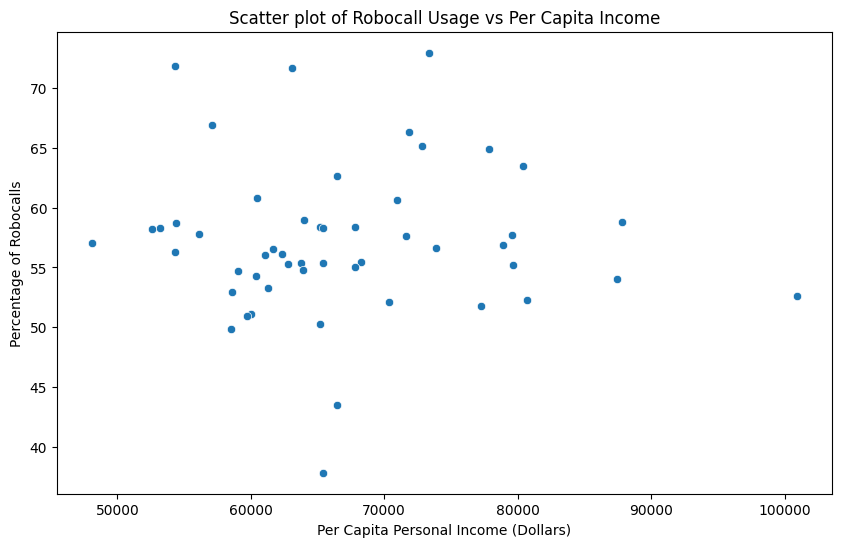

                                OLS Regression Results                                
Dep. Variable:     Recorded_Msg_Or_Robocall_Y   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                 -0.020
Method:                         Least Squares   F-statistic:                   0.01639
Date:                        Sun, 02 Jun 2024   Prob (F-statistic):              0.899
Time:                                03:46:25   Log-Likelihood:                -166.08
No. Observations:                          51   AIC:                             336.2
Df Residuals:                              49   BIC:                             340.0
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
pearson_corr, p_value = pearsonr(e_r_merged_df['Per capita personal income (dollars) 2'], e_r_merged_df['Recorded_Msg_Or_Robocall_Y'])

print(f"Pearson Correlation Coefficient: {pearson_corr}, P-value: {p_value}")

# Scatterplotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=e_r_merged_df, x='Per capita personal income (dollars) 2', y='Recorded_Msg_Or_Robocall_Y')
plt.title('Scatter plot of Robocall Usage vs Per Capita Income')
plt.xlabel('Per Capita Personal Income (Dollars)')
plt.ylabel('Percentage of Robocalls')
plt.show()


import statsmodels.api as sm


X = sm.add_constant(e_r_merged_df['Per capita personal income (dollars) 2'])
Y = e_r_merged_df['Recorded_Msg_Or_Robocall_Y']


model = sm.OLS(Y, X).fit()
predictions = model.predict(X)


print(model.summary())

The results of the analysis show that the correlation between per capita personal income and the proportion of recorded or robo-dialed numbers used in telephone fraud is extremely weak, with a Pearson's correlation coefficient of -0.018 and a p-value of 0.899, indicating that this correlation is not statistically significant. The R-squared value of the linear regression model is close to zero, further confirming the minimal effect of per capita personal income on the proportion of recorded or robo-dialed numbers used in telephone fraud. These results suggest that per capita personal income is not a major factor influencing the use of recording or robo-dialing in telephone fraud.

Next, I will continue to explore the relationship between the timing of fraudulent phone calls and the economy.

In [40]:
# Merge the selected economic data with the recorded_message_stats_pivot DataFrame
e_t_merged_df = pd.merge(economic_gdp_df, time_of_day_pivot, on='State')

# Display the first few rows of the merged DataFrame
e_t_merged_df

,State,Per capita personal income (dollars) 2,Personal income (millions of dollars),Population (persons) 1,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,Alabama,53175.0,271640.4,5108468.0,37.544214,8.691258,39.464376,14.300152
1,Alaska,71616.0,52523.9,733406.0,35.294118,7.058824,47.058824,10.588235
2,Arizona,61652.0,458153.8,7431344.0,40.730745,5.708947,46.522732,7.037575
3,Arkansas,54347.0,166721.8,3067732.0,42.857143,8.311688,40.086580,8.744589
4,California,80423.0,3133678.9,38965193.0,42.205471,6.401034,44.380788,7.012707
5,Colorado,78918.0,463852.1,5877610.0,42.072214,9.073783,41.507064,7.346939
6,Connecticut,87447.0,316311.2,3617176.0,44.712182,16.532798,32.530120,6.224900
7,Delaware,65392.0,67477.8,1031890.0,48.116438,13.869863,29.109589,8.904110
8,District of Columbia,100909.0,68514.6,678972.0,39.837398,16.802168,28.455285,14.905149
9,Florida,68248.0,1543131.7,22610726.0,44.755070,14.820996,30.952182,9.471752


Time_of_Day_Afternoon correlation with per capita income: Corr=0.026475036780820208, P-value=0.8536882397401622
Time_of_Day_Evening correlation with per capita income: Corr=0.20907977595362987, P-value=0.14090193872089884
Time_of_Day_Morning correlation with per capita income: Corr=-0.13203968870383992, P-value=0.3556801318622182
Time_of_Day_Night correlation with per capita income: Corr=-0.009427906879142222, P-value=0.9476477391439364


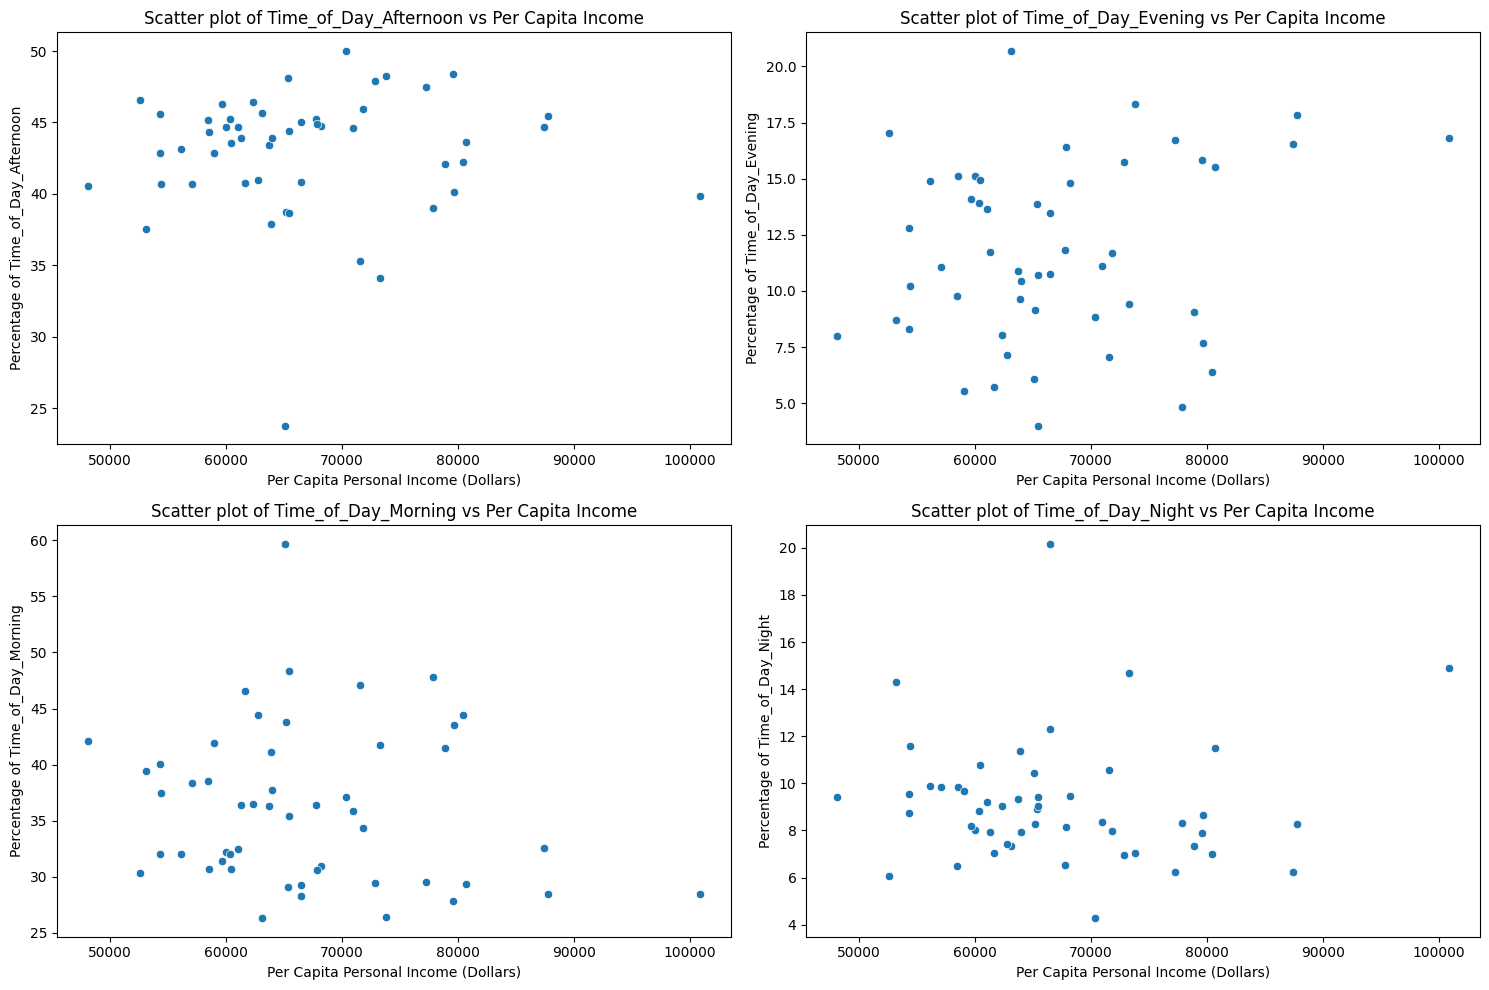

In [41]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

income_column = 'Per capita personal income (dollars) 2'

# Calculate correlation coefficients with per capita income for different time periods
for time_of_day in ['Time_of_Day_Afternoon', 'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night']:
    corr, p_value = pearsonr(e_t_merged_df[income_column], e_t_merged_df[time_of_day])
    print(f"{time_of_day} correlation with per capita income: Corr={corr}, P-value={p_value}")

plt.figure(figsize=(15, 10))

for i, time_of_day in enumerate(['Time_of_Day_Afternoon', 'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=e_t_merged_df[income_column], y=e_t_merged_df[time_of_day])
    plt.title(f"Scatter plot of {time_of_day} vs Per Capita Income")
    plt.xlabel('Per Capita Personal Income (Dollars)')
    plt.ylabel(f'Percentage of {time_of_day}')

plt.tight_layout()
plt.show()

The results of the analysis show that the correlation between telephone fraud activities and per capita personal income is weak and statistically insignificant for different time periods. The correlation coefficient with per capita income was 0.026 (p-value = 0.854) for the afternoon session, 0.209 (p-value = 0.141) for the evening session, -0.132 (p-value = 0.356) for the morning session, and -0.009 (p-value = 0.948) for the night session. These results suggest that the correlation between telephone fraud activity and per capita personal income is weak, whether in the morning, afternoon, evening, or nighttime hours.

Next, I will continue to explore the relationship between the subject of fraudulent phone calls and the economies of different regions.

In [42]:
# Merge the selected economic data with the recorded_message_stats_pivot DataFrame
e_s_merged_df = pd.merge(economic_gdp_df, subject_stats_pivot, on='State')

# Display the first few rows of the merged DataFrame
e_s_merged_df

,State,Per capita personal income (dollars) 2,Personal income (millions of dollars),Population (persons) 1,"Subject_Calls pretending to be government, businesses, or family and friends",Subject_Charities,Subject_Computer & technical support,Subject_Dropped call or no message,"Subject_Energy, solar, & utilities",Subject_Home improvement & cleaning,Subject_Home security & alarms,"Subject_Lotteries, prizes & sweepstakes",Subject_Medical & prescriptions,Subject_No Subject Provided,Subject_Other,"Subject_Reducing your debt (credit cards, mortgage, student loans)",Subject_Vacation & timeshares,Subject_Warranties & protection plans,Subject_Work from home & other ways to make money
0,Alabama,53175.0,271640.4,5108468.0,12.784234,3.890854,0.606367,5.002527,0.202122,0.303183,0.808489,0.859020,13.137948,20.111167,31.531076,7.377463,0.808489,2.324406,0.252653
1,Alaska,71616.0,52523.9,733406.0,9.411765,0.000000,0.000000,29.411765,0.000000,1.176471,0.000000,1.176471,2.352941,4.705882,27.058824,14.117647,5.882353,0.000000,4.705882
2,Arizona,61652.0,458153.8,7431344.0,5.729707,1.411667,0.352917,21.299564,2.532697,0.851152,0.269878,0.477476,9.570272,8.428482,40.357069,6.269462,0.726593,1.141789,0.581275
3,Arkansas,54347.0,166721.8,3067732.0,3.982684,2.510823,0.432900,15.930736,0.086580,0.432900,0.086580,0.432900,7.359307,11.688312,48.398268,7.272727,0.432900,0.779221,0.173160
4,California,80423.0,3133678.9,38965193.0,10.570752,1.150118,0.456601,15.869050,3.450355,2.407926,0.167995,0.460909,4.062029,13.499892,37.923756,8.744346,0.439371,0.542753,0.254146
5,Colorado,78918.0,463852.1,5877610.0,14.788069,0.879121,0.596546,24.207221,1.601256,1.161695,0.094192,0.439560,5.117739,6.907378,35.384615,6.216641,0.722135,1.726845,0.156986
6,Connecticut,87447.0,316311.2,3617176.0,4.618474,0.669344,0.736278,21.218206,5.622490,0.870147,0.066934,0.133869,9.103079,8.299866,41.097724,4.886212,0.803213,1.472557,0.401606
7,Delaware,65392.0,67477.8,1031890.0,4.965753,0.684932,0.513699,20.547945,1.712329,0.684932,0.000000,0.342466,4.452055,18.664384,41.952055,3.082192,1.027397,1.198630,0.171233
8,District of Columbia,100909.0,68514.6,678972.0,21.409214,0.813008,1.626016,10.298103,1.355014,5.420054,0.000000,0.542005,1.626016,7.046070,37.669377,10.840108,0.271003,0.542005,0.542005
9,Florida,68248.0,1543131.7,22610726.0,8.311775,1.151631,0.792790,15.505299,3.338062,0.917967,0.484019,0.542435,10.832012,5.966786,43.595093,5.441041,0.976383,1.710757,0.433948


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, subject in enumerate(e_s_merged_df.columns[4:], 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x=e_s_merged_df['Per capita personal income (dollars) 2'], y=e_s_merged_df[subject])
    plt.title(f"Scatter plot of {subject} vs Per Capita Income")
    plt.xlabel('Per Capita Personal Income (Dollars)')
    plt.ylabel(f'Percentage of {subject}')

plt.tight_layout()
plt.show()

In [43]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

income_column = 'Per capita personal income (dollars) 2'

# For each subject or type of column in the DataFrame, calculate the correlation coefficient with per capita income
for subject in subject_stats_pivot.columns[1:]:  # Skip first column (state name)
    corr, p_value = pearsonr(e_s_merged_df[income_column], e_s_merged_df[subject])
    print(f"Correlation of {subject} with per capita income: Corr={corr}, P-value={p_value}")

# Choose a theme and visualize the relationship with per capita income
# Continue from the correlation calculation
# We will create plots for each subject type's correlation with income

# Define a function to create scatter plots for correlation visualization
def plot_correlation(dataframe, income_col, subject_col):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=dataframe, x=income_col, y=subject_col)
    plt.title(f"Correlation between {subject_col} and {income_col}")
    plt.xlabel(income_col)
    plt.ylabel(f"Percentage of {subject_col}")
    plt.show()

# Now, plot the correlations for each subject
# Assuming your income column is correctly titled as 'Per capita personal income (dollars) 2'
income_column = 'Per capita personal income (dollars) 2'

# Replace 'subject_stats_pivot.columns[1:]' with the actual column names of the subject types in your DataFrame
for subject in subject_stats_pivot.columns[1:]:
    # Uncomment the following line to see each plot individually
    # plot_correlation(e_s_merged_df, income_column, subject)
    
    # Calculate and print the Pearson correlation coefficient and P-value
    corr, p_value = pearsonr(e_s_merged_df[income_column], e_s_merged_df[subject])
    print(f"{subject} - Correlation: {corr}, P-value: {p_value}")

Correlation of Subject_Calls pretending to be government, businesses, or family and friends with per capita income: Corr=0.2717062671027154, P-value=0.05376529003378187
Correlation of Subject_Charities with per capita income: Corr=-0.24690514120251258, P-value=0.0806898242091481
Correlation of Subject_Computer  & technical support with per capita income: Corr=0.25526600018309276, P-value=0.07062969590935152
Correlation of Subject_Dropped call or no message with per capita income: Corr=0.30253331981146253, P-value=0.03094304017093255
Correlation of Subject_Energy, solar,  & utilities with per capita income: Corr=0.49857170531906864, P-value=0.0001964673193946222
Correlation of Subject_Home improvement  & cleaning with per capita income: Corr=0.4912520167074428, P-value=0.00025176793610566517
Correlation of Subject_Home security  & alarms with per capita income: Corr=-0.25566654512706943, P-value=0.07017399955988629
Correlation of Subject_Lotteries, prizes  & sweepstakes with per capita 

The results of the analysis show that there are differences in the correlation between different types of phone scams and per capita personal income. Among them, Energy, Solar & Utilities (0.499, p-value < 0.001) and Home Improvement & Cleaning (0.491, p-value < 0.001) showed a strong positive correlation with per capita income, while Medical & Prescription type of scams (-0.527, p-value < 0.001) showed a significant negative correlation. In addition, missed calls or no messages (0.303, p-value ≈ 0.031) also showed a significant positive correlation. These results suggest that there are significant differences in the distribution of different types of phone scams in terms of economic characteristics, and further research is needed to understand the mechanisms behind them.

Summary:

I cleaned, transformed, and merged two datasets, merging the data through the shared variable (state) in order to analyze three research questions: the correlation between economics and time spent dialing in phone scams, robo-voice use, and scam themes. The results of the analysis showed that the correlation between per capita personal income and the percentage of recorded or robo-dialed calls used in phone scams was extremely weak and statistically insignificant. The correlation between telephone scam activity and per capita personal income across time was also weak and statistically insignificant. The correlation between phone scam themes and economic characteristics suggests that scam types vary significantly across states, but the direct correlation with economic data still needs to be further verified. Overall, the role of economic and demographic factors in telephone fraud activity is complex, and further in-depth analysis is needed to validate these associations.